In [12]:
import numpy as np
import pandas as pd

In [21]:
valores = {
    "Pais": ['Brasil','Argentina','Chile','Argentina','Chile','Brasil','Argentina','Brasil','Chile','Brasil'],
    "Edad": [44,27,30,38,40,35,np.nan,48,50,37],
    "Salario": [72000,48000,54000,61000,np.nan,58000,52000,79000,83000,67000],
    "Compro": ['No','Si','No','No','Si','Si','No','Si','No','Si']
}
df = pd.DataFrame(valores)
df

,Pais,Edad,Salario,Compro
0,Brasil,44.0,72000.0,No
1,Argentina,27.0,48000.0,Si
2,Chile,30.0,54000.0,No
3,Argentina,38.0,61000.0,No
4,Chile,40.0,NaN,Si
5,Brasil,35.0,58000.0,Si
6,Argentina,NaN,52000.0,No
7,Brasil,48.0,79000.0,Si
8,Chile,50.0,83000.0,No
9,Brasil,37.0,67000.0,Si


In [22]:
X = df.iloc[:, :-1].values #Todas las filas, y todas las columnas menos la última. Variables Independientes
y = df.iloc[:,3].values #Sólo los valores de la última columna. Variable dependiente

## Manejo de datos no definidos

In [23]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer = imputer.fit(X[:,1:3]) #Columna 1 a 2 
X[:,1:3] = imputer.transform(X[:,1:3]) #A los valores NaN de las columnas 1 y 2 los transforma a la media total

## Transformar datos categóricos a valores numéricos

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
X[:,0] = labelencoder_x.fit_transform(X[:,0]) #A la primer columna los transforma a valores numéricos

Cualquier modelo tomará esos números en forma ordinal. Como los países no son comparables aparece el concepto de Dummy o One Hot Encode.  
Para estos casos aplicamos:

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

oneHotEncoder = make_column_transformer((OneHotEncoder(), [0]), remainder='passthrough')
X = oneHotEncoder.fit_transform(X)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y) #Obtengo valores binarios de 'Si' y 'No' 


# Dividir el dataset a Datos de Entrenamiento y de Testeo (Validación)  
Aproximadamente entre el 70 y 80% del conjunto de datos se utiliza para la fase de entrenamiento, el resto para testing.  
Necesitamos crear 4 variables:
-   **X_train**: Las variables independientes que se utilizarán para entrenar el algoritmo
-   **X_test**: Datos con los que se va a testear si el algoritmo funciona correctamente
-   **y_train**: Valores de predicción que también se suministran al algoritmo para que aprenda a predecirlos.
-   **y_test**: Para validar si las predicciones de testing son correctas o no, para evaluar la performance y la eficacia del algoritmo  

## Posibles problemas:
-   **Overfitting** (Sobreajuste): Ocurre cuando se desempeña bien con los datos de entrenamiento, pero su precisión es notablemente más baja con los datos de evaluación, esto se debe a que el modelo ha memorizado los datos que ha visto y no pudo generalizar las reglas para predecir los datos que no ha visto.
-   **Underfitting** (Subajuste): Se refiere a un modelo que no puede modelar datos de entrenamiento, no puede generalizar a nuevos datos. Ocurre cuando el modelo es muy simple.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #20% para testing

In [27]:
print(X_train)
print('------------------------------')
print(X_test)
print('------------------------------')
print(y_train)
print('------------------------------')
print(y_test)

[[0.0 0.0 1.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 37.0 67000.0]
 [1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 0.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 38.0 61000.0]
 [0.0 1.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 35.0 58000.0]]
------------------------------
[[0.0 0.0 1.0 30.0 54000.0]
 [0.0 0.0 1.0 50.0 83000.0]]
------------------------------
[1 1 1 0 1 0 0 1]
------------------------------
[0 0]


# Escalar los datos  
Se realiza cuando hay una diferencia grande entre variables, en este caso Edad y Salario deben normalizarse, deben estar dentro del mismo rango de valores. El ejemplo típico es escalar entre -1 y 1, de modo que la Edad más baja corresponde a -1 y la más alta a 1. Con Salario (u otras columnas) pasa lo mismo.  
Esta normalización es muy importante para evitar que unas variables dominen sobre otras ya que aportan al proceso de predicción o clasificación 

In [28]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [29]:
X_train

array([[-0.77459667, -1.        ,  2.64575131,  0.26306757,  0.12381479],
       [-0.77459667,  1.        , -0.37796447, -0.25350148,  0.46175632],
       [ 1.29099445, -1.        , -0.37796447, -1.97539832, -1.53093341],
       [ 1.29099445, -1.        , -0.37796447,  0.05261351, -1.11141978],
       [-0.77459667,  1.        , -0.37796447,  1.64058505,  1.7202972 ],
       [ 1.29099445, -1.        , -0.37796447, -0.0813118 , -0.16751412],
       [-0.77459667,  1.        , -0.37796447,  0.95182631,  0.98614835],
       [-0.77459667,  1.        , -0.37796447, -0.59788085, -0.48214934]])

# Regresión Linear Simple  
Utiliza el método de los mínimos cuadrados para hallar la mejor recta que se ajusta a los dato. Es decir, de todas las rectas, se queda con aquella que minimiza los cuadrados de las diferencias entre el dato real y la predicción

In [31]:
datos = {
    'AniosExperiencia': [1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,3.9,4.0,4.0,4.1,4.5,4.9],
    'Salario': [39343,46205,37731,43525,39891,56642,60150,54445,64445,57189,63218,55794,56957,57881,61111,67938]
}
df = pd.DataFrame(datos)

In [33]:
df.describe()

,AniosExperiencia,Salario
count,16.00000,16.000000
mean,3.09375,53904.062500
std,1.17500,9556.885291
min,1.10000,37731.000000
25%,2.15000,45535.000000
50%,3.20000,56799.500000
75%,4.00000,60390.250000
max,4.90000,67938.000000


In [38]:
X = df.iloc[:,0].values #AniosExperiencia como variable independiente
y = df.iloc[:,1].values  #Salario como variable dependiente

In [39]:
import matplotlib.pyplot as plt 

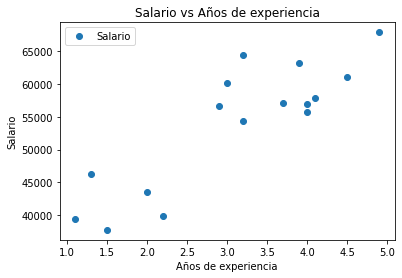

In [40]:
df.plot(x='AniosExperiencia', y='Salario', style='o')
plt.title('Salario vs Años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #1/3 de datos para test

In [44]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[4.1 2.2 1.5 4.5 3.9 3.2 4.9 4.  2.  1.1 2.9 4. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.